In [1]:
import pandas_datareader.data as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
# create start and end date variables
start = datetime.datetime(2011,1,1)
end = datetime.datetime(2021,1,1)

In [3]:
# use DataReader from pandas to return data from yahoo finance, for Invesco QQQ ETF
qqq = web.DataReader('QQQ', 'yahoo', start, end)

In [4]:
qqq.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,310.019989,308.390015,308.470001,309.559998,16785000.0,309.559998
2020-12-28,313.170013,310.359985,312.250000,312.679993,22497700.0,312.679993
2020-12-29,314.690002,312.029999,314.049988,312.959991,25871900.0,312.959991
2020-12-30,314.489990,312.329987,314.160004,312.970001,18138100.0,312.970001
2020-12-31,314.239990,311.760010,312.869995,313.739990,21611400.0,313.739990


In [5]:
qqq['Open']

Date
2011-01-03     54.970001
2011-01-04     55.509998
2011-01-05     55.099998
2011-01-06     55.799999
2011-01-07     56.020000
                 ...    
2020-12-24    308.470001
2020-12-28    312.250000
2020-12-29    314.049988
2020-12-30    314.160004
2020-12-31    312.869995
Name: Open, Length: 2517, dtype: float64

### Plotting Data

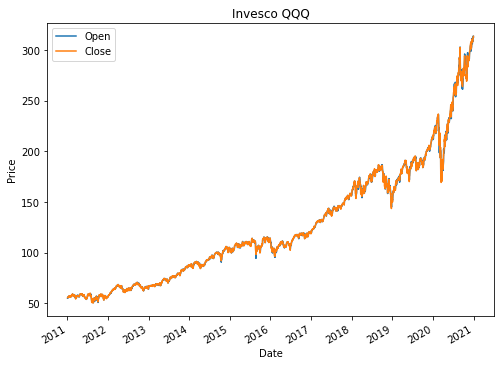

In [6]:
qqq['Open'].plot(figsize=(8,6))
qqq['Close'].plot()
plt.title('Invesco QQQ')
plt.ylabel('Price')
plt.legend()
plt.show()

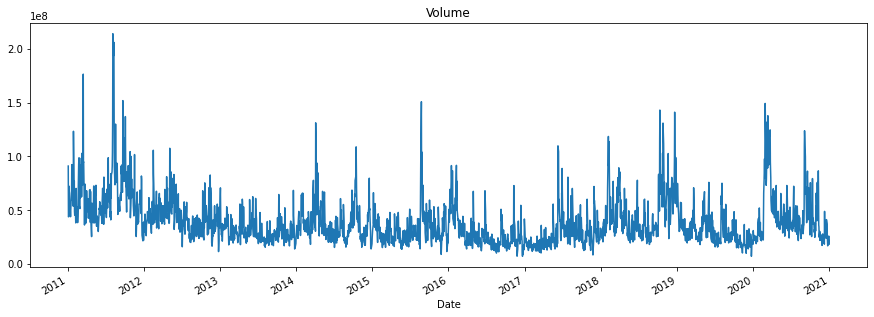

In [7]:
qqq.Volume.plot(figsize=(15,5))
plt.title('Volume')
plt.show()

### U.S. Automakers

In [8]:
f = web.DataReader('F', 'yahoo', start, end)
gm = web.DataReader('GM', 'yahoo', start, end)
tsla = web.DataReader('TSLA', 'yahoo', start, end)

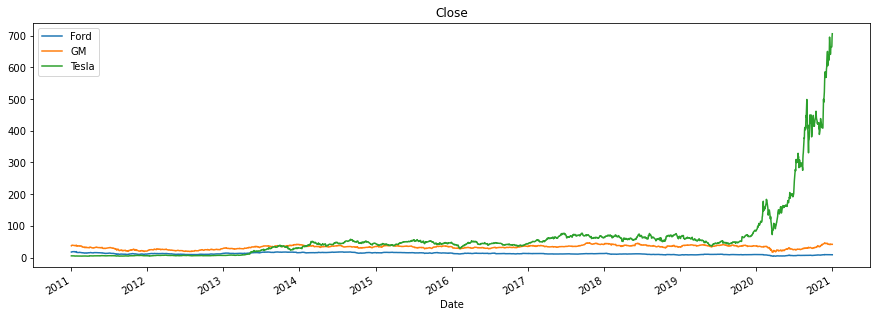

In [9]:
f.Close.plot(label="Ford",figsize=(15,5))
gm.Close.plot(label="GM")
tsla.Close.plot(label="Tesla")
plt.title('Close')
plt.legend()
plt.show()

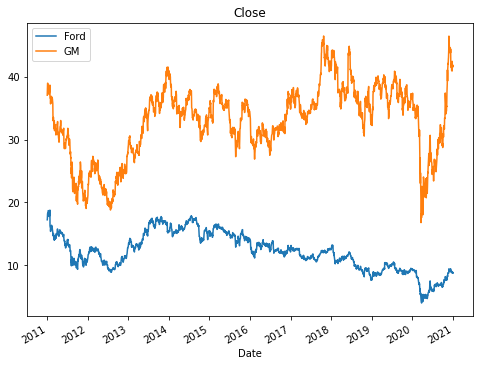

In [10]:
f.Close.plot(label="Ford", figsize=(8,6))
gm.Close.plot(label="GM")
plt.title('Close')
plt.legend()
plt.show()

In [11]:
# save data to CSV
#tsla.to_csv('Tesla_stock.csv')

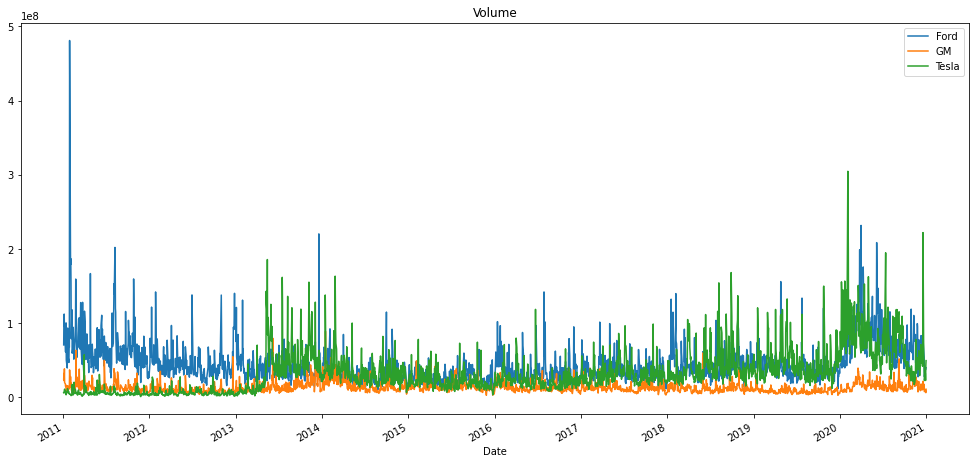

In [12]:
f.Volume.plot(label="Ford",figsize=(17,8))
gm.Volume.plot(label="GM")
tsla.Volume.plot(label="Tesla")
plt.legend()
plt.title('Volume')
plt.show()

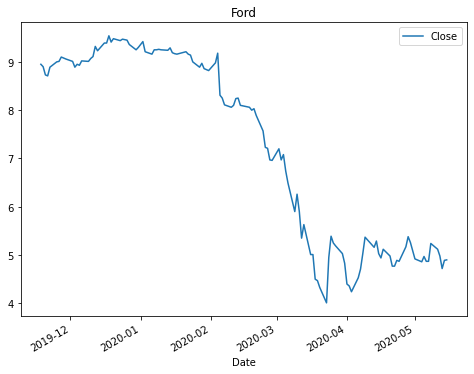

In [13]:
# explore data within the dataset
f.loc[(f.index >= '2019-11-16')&(f.index <= '2020-05-16')]["Close"].plot(figsize=(8,6))
plt.legend()
plt.title("Ford")
plt.show()

### Total Traded

In [14]:
# visualization of total traded (open price multiplied by volume)
tsla['Total Traded'] = tsla['Open'] * tsla['Volume']
f['Total Traded'] = f['Open'] * f['Volume']
gm['Total Traded'] = gm['Open'] * gm['Volume']

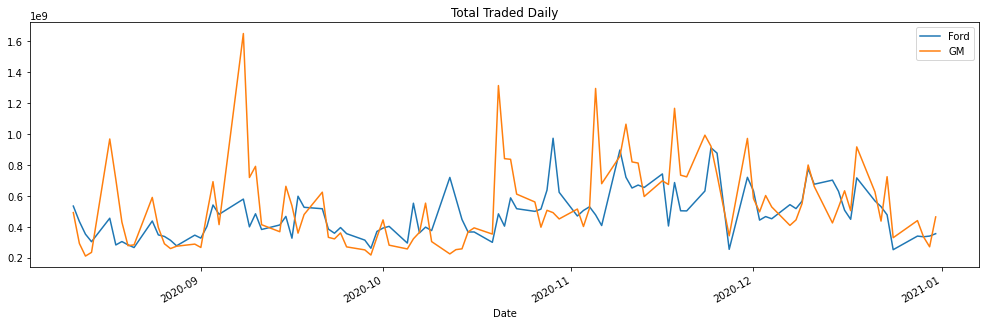

In [15]:
#tsla['Total Traded'].tail(25).plot(figsize=(17,5), label="Tesla")
f['Total Traded'].tail(100).plot(figsize=(17,5), label="Ford")
gm['Total Traded'].tail(100).plot(label="GM")
plt.legend()
plt.title('Total Traded Daily')
plt.show()

### Moving Averages

In [16]:
f['MA50'] = f['Close'].rolling(50).mean()

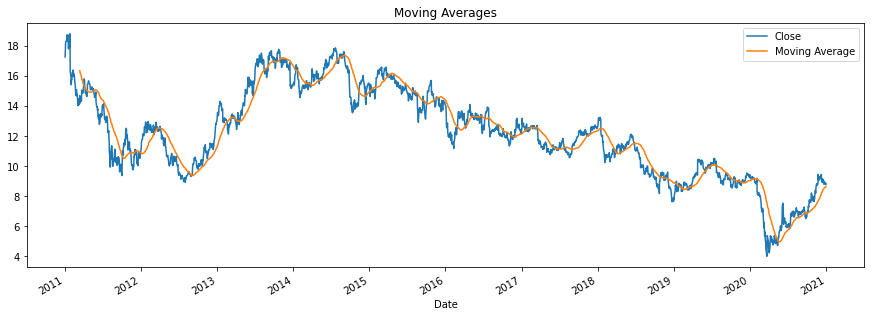

In [17]:
f.Close.plot(figsize=(15,5), label='Close')
f.MA50.plot(label='Moving Average')
plt.title('Moving Averages')
plt.legend()
plt.show()

In [18]:
f['MA200'] = f['Close'].rolling(200).mean()

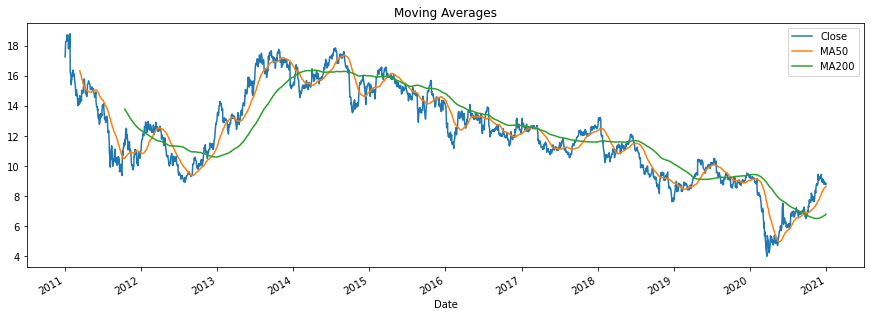

In [19]:
f.Close.plot(figsize=(15,5), label='Close')
f.MA50.plot(label='MA50')
f.MA200.plot(label='MA200')
plt.title('Moving Averages')
plt.legend()
plt.show()

### Correlation & Scatter Matrix

In [20]:
from pandas.plotting import scatter_matrix

In [21]:
car_comp = pd.concat([f.Close, gm.Close, tsla.Close], axis = 1)
car_comp.columns = ['Ford Close', 'GM Close', 'Tesla Close']

In [22]:
car_comp

,Ford Close,GM Close,Tesla Close
Date,,,
2011-01-03,17.250000,37.060001,5.324000
2011-01-04,17.379999,37.900002,5.334000
2011-01-05,17.889999,38.070000,5.366000
2011-01-06,18.219999,38.900002,5.576000
2011-01-07,18.270000,38.980000,5.648000
...,...,...,...
2020-12-24,8.860000,41.580002,661.770020
2020-12-28,8.890000,41.660000,663.690002
2020-12-29,8.820000,41.570000,665.989990


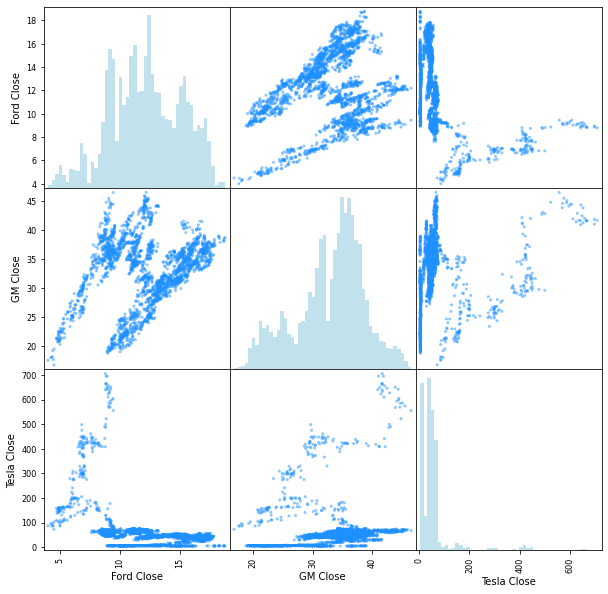

In [23]:
# Correlation map of columns
scatter_matrix(car_comp, figsize=(10,10), color='dodgerblue', hist_kwds={'color':'lightblue', 'alpha':0.75, 'bins':50})
plt.show()

### Candlestick Charts

In [24]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

C:\Users\stuhu\anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [25]:
ford_reset = f.loc['2020-1':'2020-7'].reset_index()
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))
ford_values = [tuple(vals) for vals in ford_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

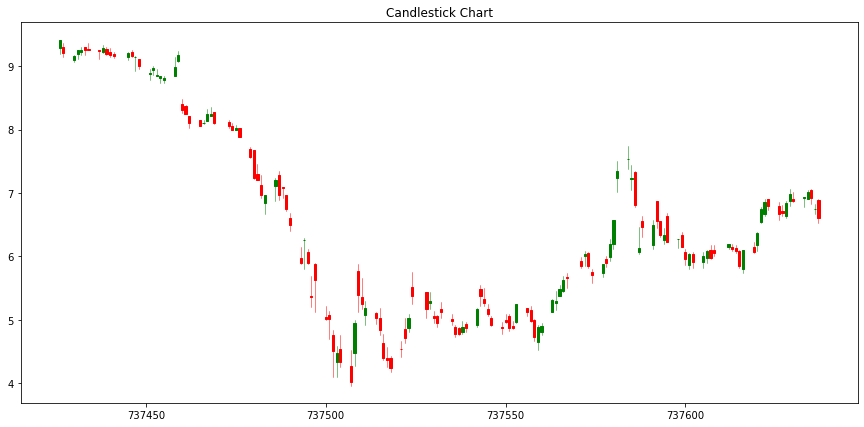

In [26]:
fig, ax = plt.subplots(figsize=(15,7))
candlestick_ohlc(ax, ford_values, width = 0.6, colorup='g')
plt.title('Candlestick Chart')
plt.show()

### Daily Percentage Change
return at time = (price at time / price at (time - 1)) - 1 : percentage gain or loss, to examine stability/volatility

In [27]:
tsla['returns'] = (tsla['Close']/tsla['Close'].shift(1)) - 1

In [28]:
tsla

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2011-01-03,5.400000,5.180000,5.36800,5.324000,6415000.0,5.324000,3.443572e+07,NaN
2011-01-04,5.390000,5.204000,5.33200,5.334000,5937000.0,5.334000,3.165608e+07,0.001878
2011-01-05,5.380000,5.238000,5.29600,5.366000,7233500.0,5.366000,3.830862e+07,0.005999
2011-01-06,5.600000,5.362000,5.36600,5.576000,10306000.0,5.576000,5.530200e+07,0.039135
2011-01-07,5.716000,5.580000,5.60000,5.648000,11239500.0,5.648000,6.294120e+07,0.012912
...,...,...,...,...,...,...,...,...
2020-12-24,666.090027,641.000000,642.98999,661.770020,22865600.0,661.770020,1.470235e+10,0.024444
2020-12-28,681.400024,660.799988,674.51001,663.690002,32278600.0,663.690002,2.177224e+10,0.002901
2020-12-29,669.900024,655.000000,661.00000,665.989990,22910800.0,665.989990,1.514404e+10,0.003465


In [29]:
f['returns'] = (f['Close']/f['Close'].shift(1)) - 1
gm['returns'] = (gm['Close']/gm['Close'].shift(1)) - 1

### Volatility

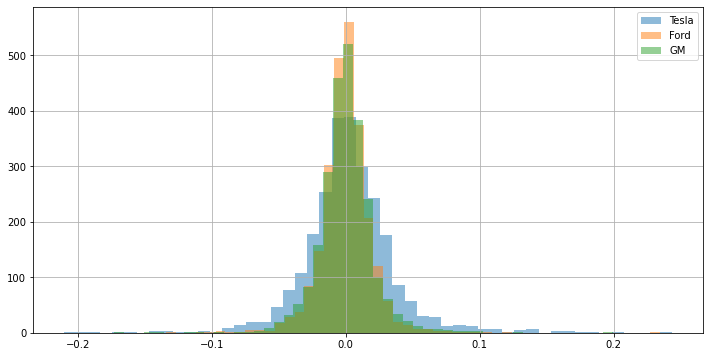

In [30]:
# wider for tesla: more volatile
tsla['returns'].hist(bins=50, figsize=(12,6), label='Tesla', alpha=0.5)
f['returns'].hist(bins=50, label='Ford', alpha=0.5)
gm['returns'].hist(bins=50, label='GM', alpha=0.5)
plt.legend()
plt.show()

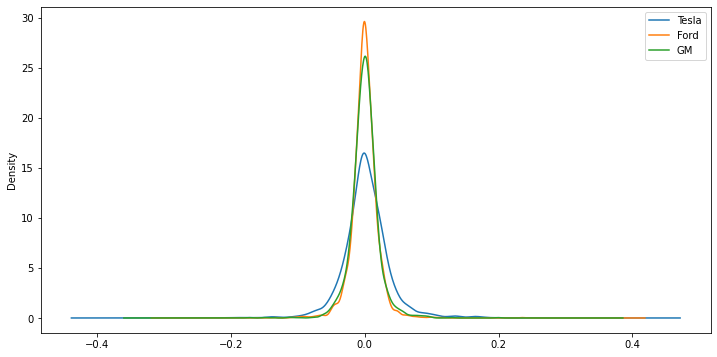

In [31]:
# plot a histogram kernel for clarity (probability density function; normalized)
tsla.returns.plot(kind='kde', label='Tesla', figsize=(12,6))
f.returns.plot(kind='kde', label='Ford')
gm.returns.plot(kind='kde', label='GM')
plt.legend()
plt.show()

### Box Plots

In [32]:
box_df = pd.concat([f.returns, gm.returns, tsla.returns], axis = 1)
box_df.columns = ['Ford Returns', 'GM Returns', 'Tesla Returns']

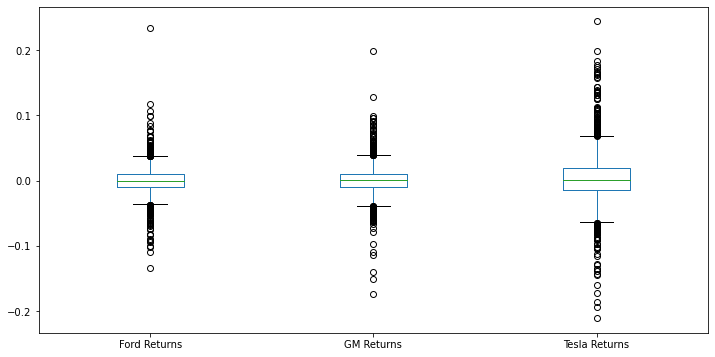

In [33]:
# Tesla more volatile in this period than GM or Ford, daily returns are more spread out
box_df.plot(kind="box", figsize=(12,6))
plt.show()

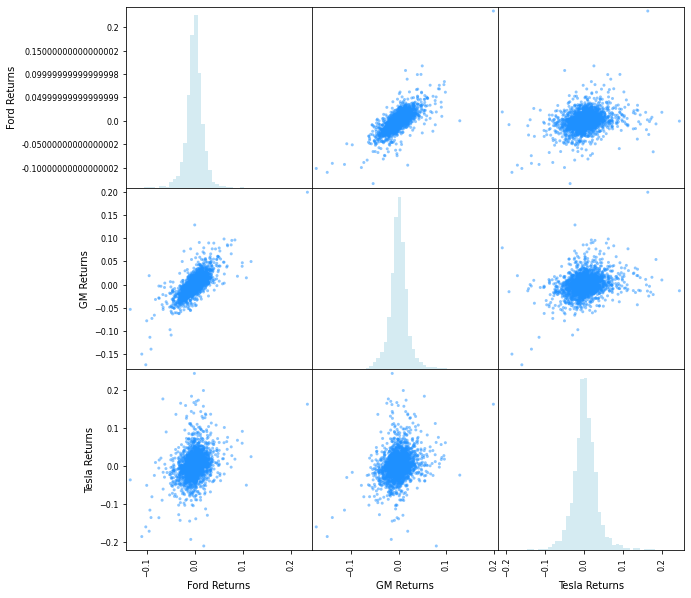

In [34]:
scatter_matrix(box_df, figsize=(10,10), color='dodgerblue', hist_kwds={'color':'lightblue', 'alpha':0.5, 'bins':50})
plt.show()

### Cumulative Return

In [35]:
# if return is above 1: profitable; the higher the ratio the better
tsla['Cumulative Return'] = (1 + tsla.returns).cumprod()

In [36]:
tsla

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2011-01-03,5.400000,5.180000,5.36800,5.324000,6415000.0,5.324000,3.443572e+07,NaN,NaN
2011-01-04,5.390000,5.204000,5.33200,5.334000,5937000.0,5.334000,3.165608e+07,0.001878,1.001878
2011-01-05,5.380000,5.238000,5.29600,5.366000,7233500.0,5.366000,3.830862e+07,0.005999,1.007889
2011-01-06,5.600000,5.362000,5.36600,5.576000,10306000.0,5.576000,5.530200e+07,0.039135,1.047333
2011-01-07,5.716000,5.580000,5.60000,5.648000,11239500.0,5.648000,6.294120e+07,0.012912,1.060856
...,...,...,...,...,...,...,...,...,...
2020-12-24,666.090027,641.000000,642.98999,661.770020,22865600.0,661.770020,1.470235e+10,0.024444,124.299405
2020-12-28,681.400024,660.799988,674.51001,663.690002,32278600.0,663.690002,2.177224e+10,0.002901,124.660033
2020-12-29,669.900024,655.000000,661.00000,665.989990,22910800.0,665.989990,1.514404e+10,0.003465,125.092037


In [37]:
f['Cumulative Return'] = (1 + f.returns).cumprod()
gm['Cumulative Return'] = (1 + gm.returns).cumprod()

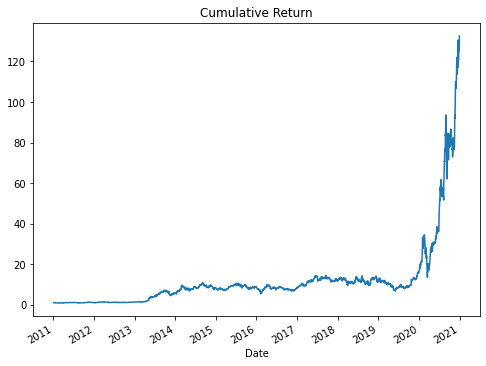

In [38]:
tsla['Cumulative Return'].plot(figsize=(8,6))
plt.title('Cumulative Return')
plt.show()

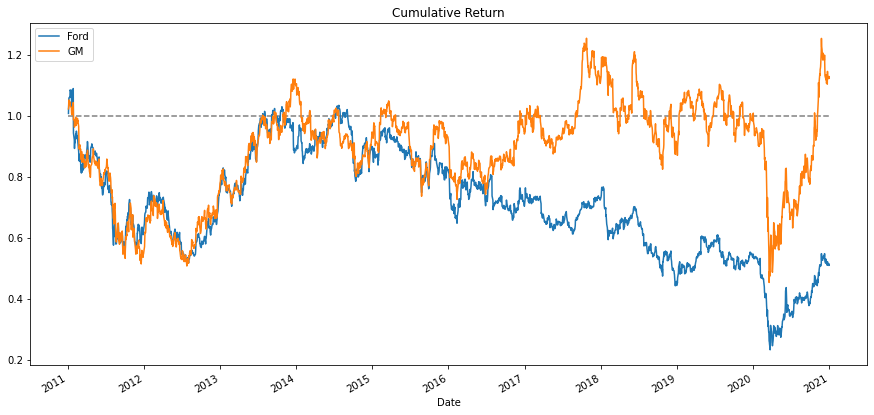

In [39]:
f['Cumulative Return'].plot(label='Ford', figsize=(15,7))
gm['Cumulative Return'].plot(label='GM')
plt.hlines(y=1, xmin=gm.index.min(), xmax=gm.index.max(), alpha=0.5, linestyles='dashed')
plt.title('Cumulative Return')
plt.legend()
plt.show()